In [1]:

#from tensorflow.keras.layes import flatten,Dense,Conv2d
import numpy as np
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam



D:\UserGuidePDF\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\UserGuidePDF\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\UserGuidePDF\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\UserGuidePDF\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.layers import Conv2D

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.1)


In [5]:
train_data=datagen.flow_from_directory(r"D:\RAJ\AI\dataset\training_set", target_size=(32,32), class_mode='sparse')
test_data=datagen.flow_from_directory(r"D:\RAJ\AI\dataset\test_set", target_size=(64,64), class_mode='sparse')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
model=Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (32,32, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(40, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(42, (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(52, (2, 2), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (1, 1)))

#model.add(Conv2D(62, (2, 2), activation = 'relu')) 
#model.add(MaxPooling2D(pool_size = (1, 1)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2, activation='softmax'))

In [7]:
print(train_data.class_indices)
print(test_data.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


In [8]:
adam = Adam(lr=0.001)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit_generator(train_data, epochs=40)

Epoch 1/40
250/250 [==============================] - 209s 837ms/step - loss: 0.6823 - accuracy: 0.5451
Epoch 2/40
250/250 [==============================] - 26s 104ms/step - loss: 0.6185 - accuracy: 0.6561
Epoch 3/40
250/250 [==============================] - 28s 114ms/step - loss: 0.5704 - accuracy: 0.7065
Epoch 4/40
250/250 [==============================] - 30s 121ms/step - loss: 0.5368 - accuracy: 0.7258
Epoch 5/40
250/250 [==============================] - 29s 116ms/step - loss: 0.5020 - accuracy: 0.7510
Epoch 6/40
250/250 [==============================] - 29s 116ms/step - loss: 0.4835 - accuracy: 0.7626
Epoch 7/40
250/250 [==============================] - 29s 116ms/step - loss: 0.4608 - accuracy: 0.7815
Epoch 8/40
250/250 [==============================] - 29s 115ms/step - loss: 0.4441 - accuracy: 0.7855
Epoch 9/40
250/250 [==============================] - 29s 116ms/step - loss: 0.4187 - accuracy: 0.8048
Epoch 10/40
250/250 [==============================] - 29s 115ms/step - 

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 40)        11560     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 40)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 42)          15162     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 42)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 52)          8

In [10]:
model.save("D:\RAJ\AI\CNN\catdogmodel.h5")

In [11]:
from tensorflow.keras.models import load_model

In [23]:
model1=load_model=(r"D:\RAJ\AI\CNN\catdogmodel.h5")

In [24]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

In [31]:
img1 = image.load_img (r'D:\RAJ\AI\dataset\training_set\cats\cat.14.jpg', target_size=(32,32))

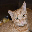

In [32]:
img1

In [34]:
img = image.img_to_array(img1)

In [35]:
img

array([[[ 22.,  16.,  16.],
        [ 25.,  19.,  19.],
        [ 24.,  18.,  18.],
        ...,
        [ 31.,  25.,  25.],
        [ 29.,  23.,  23.],
        [ 29.,  23.,  23.]],

       [[ 24.,  18.,  18.],
        [ 26.,  20.,  20.],
        [ 25.,  19.,  19.],
        ...,
        [ 30.,  24.,  24.],
        [ 28.,  22.,  22.],
        [ 27.,  21.,  21.]],

       [[ 25.,  20.,  17.],
        [ 27.,  22.,  19.],
        [ 28.,  20.,  18.],
        ...,
        [ 30.,  25.,  22.],
        [ 27.,  22.,  19.],
        [ 29.,  24.,  21.]],

       ...,

       [[125., 100.,  80.],
        [140., 108.,  83.],
        [157., 130., 109.],
        ...,
        [116., 100.,  87.],
        [110.,  90.,  63.],
        [127., 101.,  76.]],

       [[137., 107.,  83.],
        [146., 109.,  80.],
        [150., 120.,  94.],
        ...,
        [ 67.,  54.,  45.],
        [ 86.,  74.,  62.],
        [105.,  87.,  77.]],

       [[139., 107.,  86.],
        [156., 125.,  96.],
        [161., 1

In [36]:
img = img/255

In [37]:
img

array([[[0.08627451, 0.0627451 , 0.0627451 ],
        [0.09803922, 0.07450981, 0.07450981],
        [0.09411765, 0.07058824, 0.07058824],
        ...,
        [0.12156863, 0.09803922, 0.09803922],
        [0.11372549, 0.09019608, 0.09019608],
        [0.11372549, 0.09019608, 0.09019608]],

       [[0.09411765, 0.07058824, 0.07058824],
        [0.10196079, 0.07843138, 0.07843138],
        [0.09803922, 0.07450981, 0.07450981],
        ...,
        [0.11764706, 0.09411765, 0.09411765],
        [0.10980392, 0.08627451, 0.08627451],
        [0.10588235, 0.08235294, 0.08235294]],

       [[0.09803922, 0.07843138, 0.06666667],
        [0.10588235, 0.08627451, 0.07450981],
        [0.10980392, 0.07843138, 0.07058824],
        ...,
        [0.11764706, 0.09803922, 0.08627451],
        [0.10588235, 0.08627451, 0.07450981],
        [0.11372549, 0.09411765, 0.08235294]],

       ...,

       [[0.49019608, 0.39215687, 0.3137255 ],
        [0.54901963, 0.42352942, 0.3254902 ],
        [0.6156863 , 0

In [38]:
img = np.expand_dims(img, axis=0)

In [40]:
img.shape

(1, 32, 32, 3)

In [43]:
prediction = model.predict_classes(img)

In [44]:
prediction

array([0], dtype=int64)

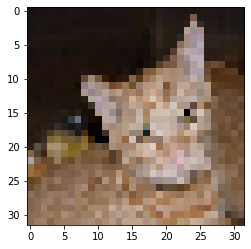

In [47]:
plt.imshow(img1)
plt.show()